## Image Pre-processing 

Binarisation, Thresholding, Rescaling and Noise Removal

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('invoice.jpg') # Read the image

plt.rcParams['figure.figsize'] = (12, 12) # Increase size of image

(<matplotlib.axes._subplots.AxesSubplot at 0x7f341f5bba10>,
 Text(0.5, 1.0, 'Grayscale'))

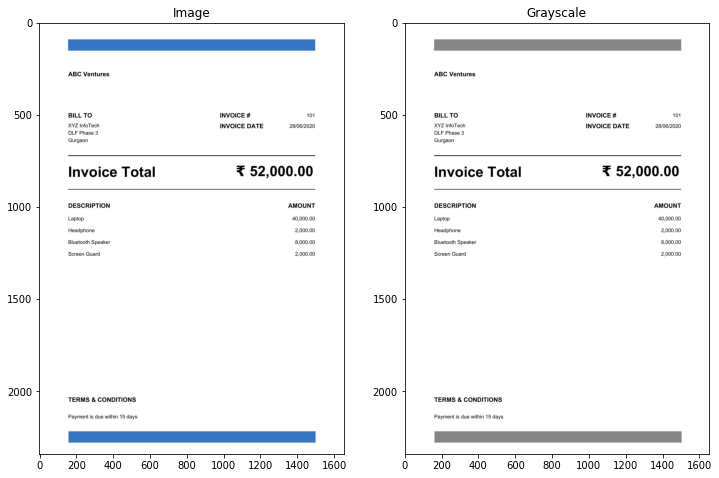

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converting BGR image read by opencv to RGB for matplot to display

plt.subplot(121), plt.imshow(image), plt.title('Image')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(122), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')

## Thresholding 


###  Simple Thresholding/Binarization

(<matplotlib.axes._subplots.AxesSubplot at 0x7f341e52b050>,
 Text(0.5, 1.0, 'Simple Threshold'))

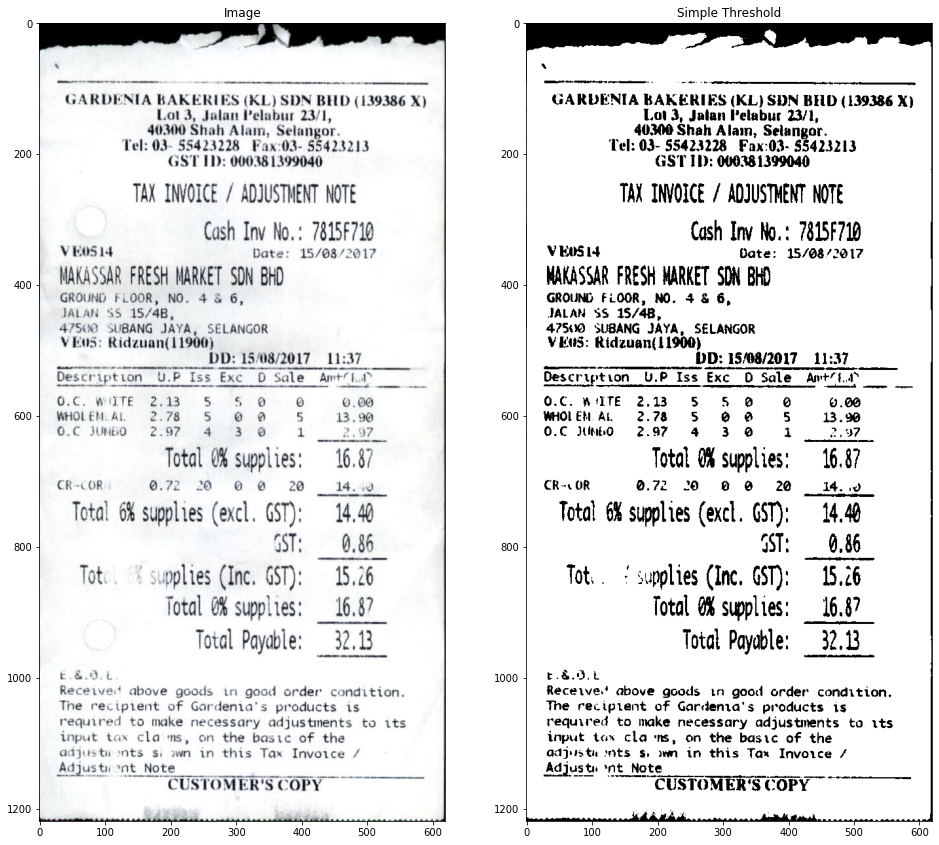

In [ ]:
image = cv2.imread('image.jpg') # Read the image 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(121), plt.imshow(image), plt.title('Image')

# cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)
ret, image2 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

plt.subplot(122), plt.imshow(image2, cmap='gray'), plt.title('Simple Threshold')

### Adaptive Thresholding 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3420532810>,
 Text(0.5, 1.0, 'Adaptive Thresholding'))

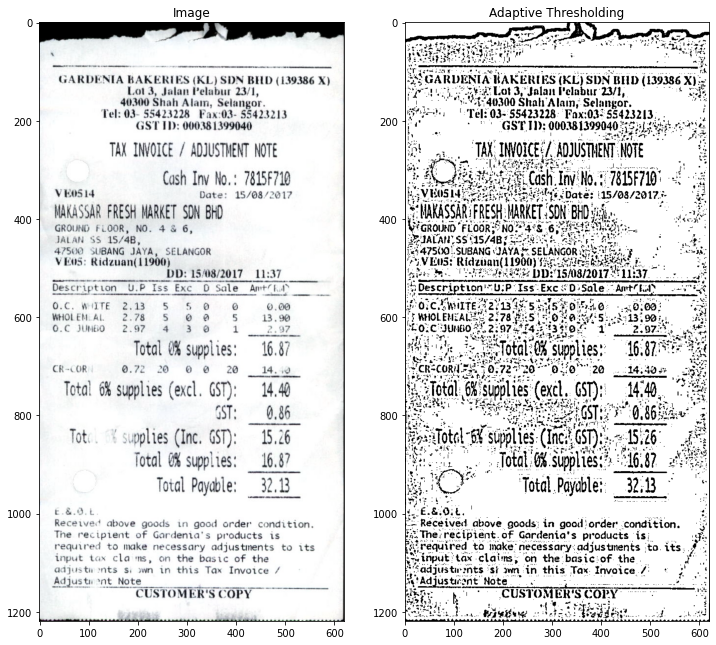

In [ ]:
# cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant) 
image_th1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

plt.subplot(121),plt.imshow(image, cmap='gray'),plt.title('Image')
plt.subplot(122),plt.imshow(image_th1, cmap='gray'),plt.title('Adaptive Thresholding')

## Noise Removal - Dilation and Erosion 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f341f20b910>,
 Text(0.5, 1.0, 'Erosion'))

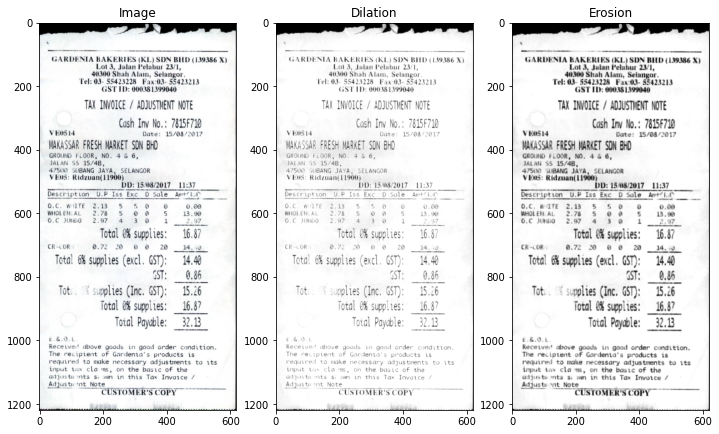

In [ ]:
kernel = np.ones((2,2), dtype=np.uint8)  # Region

image3 = cv2.dilate(gray, kernel, iterations=1)
image4 = cv2.erode(image3,kernel, iterations =2)

plt.subplot(131), plt.imshow(image), plt.title('Image')
plt.subplot(132),plt.imshow(image3, cmap='gray'),plt.title('Dilation')
plt.subplot(133),plt.imshow(image4, cmap='gray'),plt.title('Erosion')


## Noise Removal - Morphology Operations 

**cv2.getStructuringElement(shape, ksize[, anchor])** --> We generally use kernel of rectangular shape, but in some cases, we may need elliptical/circular shaped kernels. OpenCV has a function, cv.getStructuringElement(), to which we can pass the shape and size of the kernel, to get the desired kernel.
https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html



**cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])**-> Performs advanced morphological transformations.





(<matplotlib.axes._subplots.AxesSubplot at 0x7f341f8acfd0>,
 Text(0.5, 1.0, 'Morphology'))

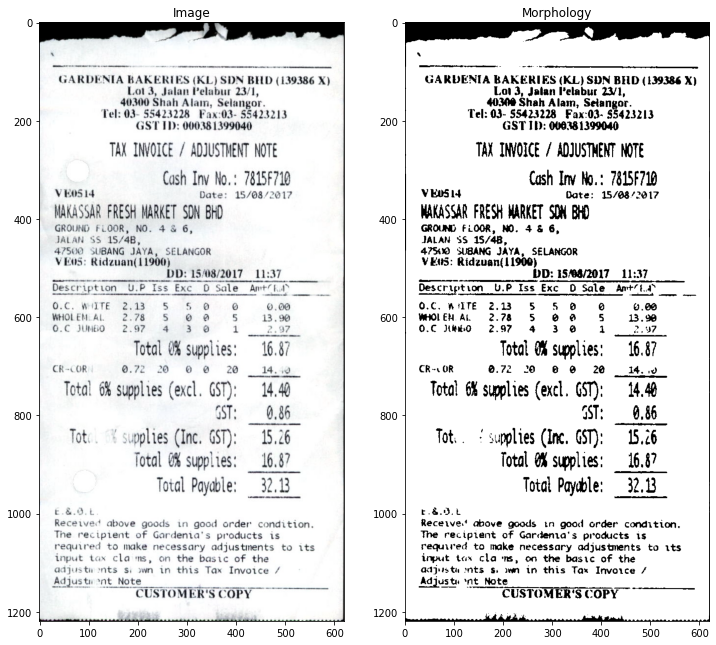

In [ ]:
ret, image1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY) # Binarization

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,1)) # array([[1, 1]], dtype=uint8)

# Morph open to remove noise
# an opening operation -> dst=open(src,element)=dilate(erode(src,element))
image2 = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel, iterations=1)

plt.subplot(121), plt.imshow(image), plt.title('Image')
plt.subplot(122), plt.imshow(image2, cmap='gray'),plt.title('Morphology')

## Orientation/Rotation 

In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,029 kB/s)
Selecting previously unselect

In [ ]:
! pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=86adc09331d5bf834b8d49d7cd96e9c1e835f6c826fa35cb79a2cc1ab96551a4
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

[OSD] Page number: 0
Orientation in degrees: 90
Rotate: 270
Orientation confidence: 4.36
Script: Latin
Script confidence: 1.97

[ANGLE] 90.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa424d29150>,
 Text(0.5, 1.0, 'rotated'))

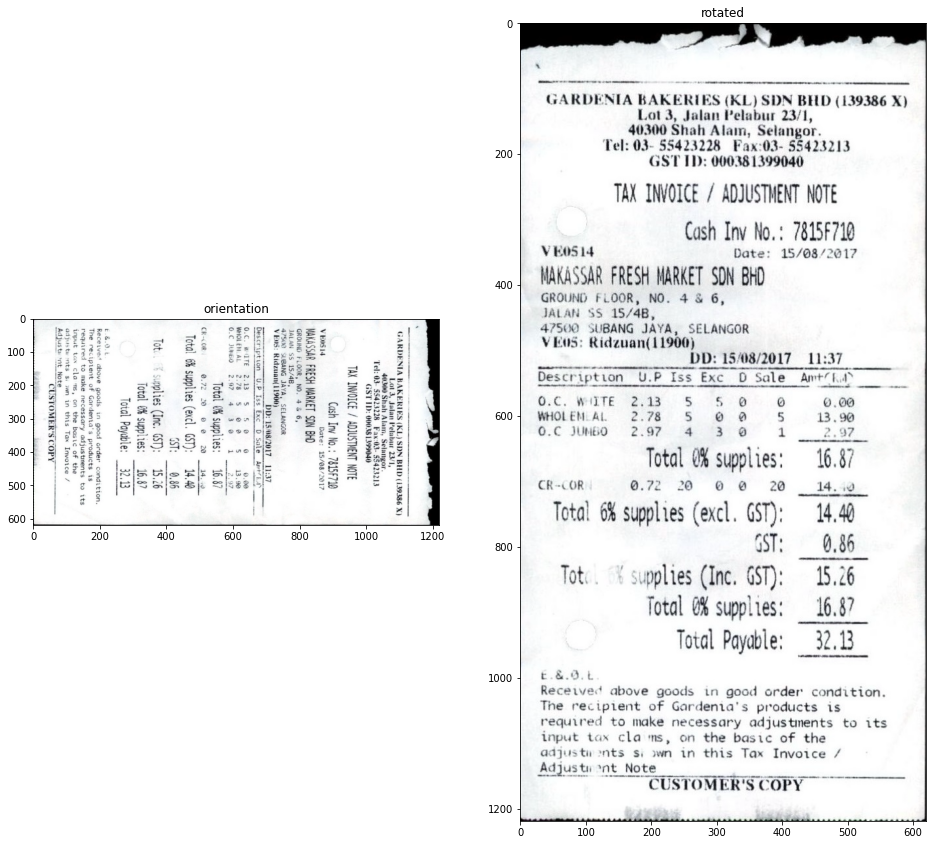

In [ ]:
import pytesseract
import re

img = cv2.imread("orientation.jpg")

rot_data = pytesseract.image_to_osd(img);
print("[OSD] "+rot_data)
rot = re.search('(?<=Rotate: )\d+', rot_data).group(0)

angle = float(rot)
if angle > 0:
    angle = 360 - angle
print("[ANGLE] "+str(angle))

if (str(int(angle)) == '0'):
    rotated = img
    
elif (str(int(angle)) == '90'):
    rotated = cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
    
elif (str(int(angle)) == '180'):
    rotated = cv2.rotate(img,cv2.ROTATE_180)
    
elif (str(int(angle)) == '270'):
    rotated = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)

plt.rcParams['figure.figsize'] = (16,16) # Increase size of image
plt.subplot(121),plt.imshow(img),plt.title('orientation')
plt.subplot(122),plt.imshow(rotated),plt.title('rotated')

## Combining All Techniques

[OSD] Page number: 0
Orientation in degrees: 90
Rotate: 270
Orientation confidence: 1.70
Script: Latin
Script confidence: 2.11

[ANGLE] 90.0
as > Sew

.

mee me

GARDENIA BAKERIES (KL) SDN BED (139386 X)
Lat 3, Jalan ’elabur 23/1,
40300 Shah Alam, Selangor
Tel: 03- $5423228 Fax: aaa s 423213
GST ID: 0003813

TAX INVOICE / ADJUSTMENT NOTE
Cash Inv No.: 7815F718

VEoSI4 Date: 15/08/2017

NAKASSAR FRESH MARKET SON BHD

GROUND FLOOR, NO. 4 & 6,
JALAN SS 15/48,
47500 SUBANG JAYA, SELANGOR
V EUS: Ridzuan( 11900)
DD: 18/08/2017 11:37

Description U.P Iss Exc D Sale Amt? td S

O.C. WHITE 2.13 5S 5S 8 e 6.08
WHOLEM Al 82.78 5S 6 @ 5 13.98

0.C Jtimbo 2.97 4 3 @ i 2,97
Total @& supplies: 16.87
CR~-. OR ®.72 20 8 8 2 14. ww

Total 6% supplies (excl. GST): 14.48
ST: 0,86

Tot.“ supplies (Inc. GST): 15.26
Total @% supplies: 16.8?

Total Payable: 32.8

r. 6.9.0 |
Receive: above goods in good order condition.

The recipient of Gardenia’s products 1s

required to make necessary adjustments to its
inpu

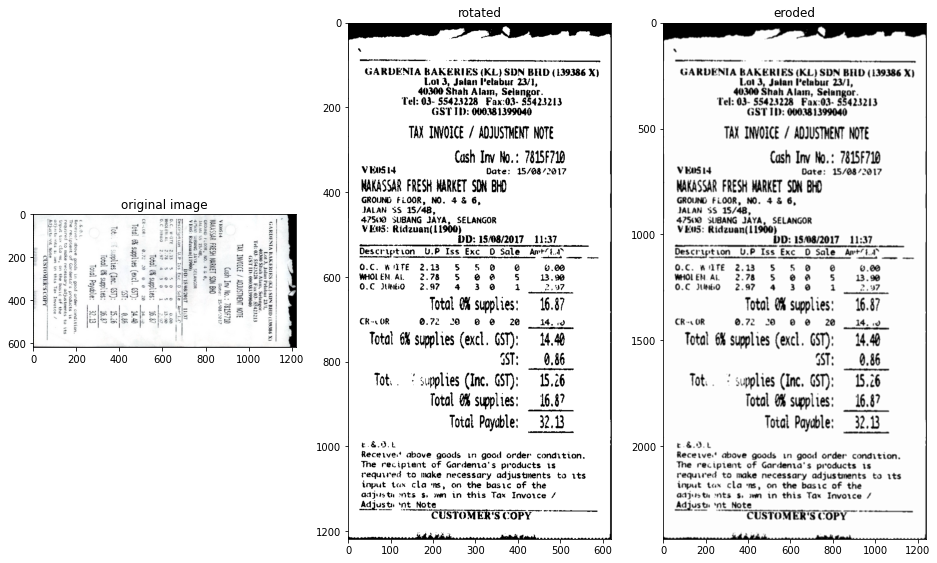

In [ ]:
import cv2
import re
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

image = cv2.imread('orientation.jpg') # Read the image 

# Binarisation
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Thresholding 
ret, image2 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

## Fix Orientation 
rot_data = pytesseract.image_to_osd(image2);
print("[OSD] "+rot_data)
rot = re.search('(?<=Rotate: )\d+', rot_data).group(0)

angle = float(rot)
if angle > 0:
    angle = 360 - angle
print("[ANGLE] "+str(angle))

if (str(int(angle)) == '0'):
    rotated = image2
    
elif (str(int(angle)) == '90'):
    rotated = cv2.rotate(image2,cv2.ROTATE_90_COUNTERCLOCKWISE)
    
elif (str(int(angle)) == '180'):
    rotated = cv2.rotate(image2,cv2.ROTATE_180)
    
elif (str(int(angle)) == '270'):
    rotated = cv2.rotate(image2,cv2.ROTATE_90_CLOCKWISE)

## Apply median blur
image_blur = cv2.GaussianBlur(rotated, (3,3), cv2.BORDER_DEFAULT) 

# lets increase the size of our image/ increasing the size by 0.5 times
image1 = cv2.resize(image_blur, None, fx = 2.0, fy = 2.0 , interpolation = cv2.INTER_CUBIC)

kernel = np.ones((2,2), dtype=np.uint8)
image3 = cv2.dilate(image1,kernel, iterations =2)

kernel = np.ones((2,2), dtype=np.uint8)
image4 = cv2.erode(image3,kernel, iterations =2)

plt.subplot(131), plt.imshow(image), plt.title('original image')
plt.subplot(132), plt.imshow(rotated, cmap='gray'), plt.title('rotated')
plt.subplot(133), plt.imshow(image4, cmap='gray'), plt.title('eroded')

text = pytesseract.image_to_string(image4, lang='eng')
print(text)